1/1000
2/1000
3/1000
4/1000
5/1000
6/1000
7/1000
8/1000
9/1000
10/1000
11/1000
12/1000
13/1000
14/1000
15/1000
16/1000
17/1000
18/1000
19/1000
20/1000
21/1000
22/1000
23/1000
24/1000
25/1000
26/1000
27/1000
28/1000
29/1000
30/1000
31/1000
32/1000
33/1000
34/1000
35/1000
36/1000
37/1000
38/1000
39/1000
40/1000
41/1000
42/1000
43/1000
44/1000
45/1000
46/1000
47/1000
48/1000
49/1000
50/1000
51/1000
52/1000
53/1000
54/1000
55/1000
56/1000
57/1000
58/1000
59/1000
60/1000
61/1000
62/1000
63/1000
64/1000
65/1000
66/1000
67/1000
68/1000
69/1000
70/1000
71/1000
72/1000
73/1000
74/1000
75/1000
76/1000
77/1000
78/1000
79/1000
80/1000
81/1000
82/1000
83/1000
84/1000
85/1000
86/1000
87/1000
88/1000
89/1000
90/1000
91/1000
92/1000
93/1000
94/1000
95/1000
96/1000
97/1000
98/1000
99/1000
100/1000
101/1000
102/1000
103/1000
104/1000
105/1000
106/1000
107/1000
108/1000
109/1000
110/1000
111/1000
112/1000
113/1000
114/1000
115/1000
116/1000
117/1000
118/1000
119/1000
120/1000
121/1000
122/1000
123/1000
1

925/1000
926/1000
927/1000
928/1000
929/1000
930/1000
931/1000
932/1000
933/1000
934/1000
935/1000
936/1000
937/1000
938/1000
939/1000
940/1000
941/1000
942/1000
943/1000
944/1000
945/1000
946/1000
947/1000
948/1000
949/1000
950/1000
951/1000
952/1000
953/1000
954/1000
955/1000
956/1000
957/1000
958/1000
959/1000
960/1000
961/1000
962/1000
963/1000
964/1000
965/1000
966/1000
967/1000
968/1000
969/1000
970/1000
971/1000
972/1000
973/1000
974/1000
975/1000
976/1000
977/1000
978/1000
979/1000
980/1000
981/1000
982/1000
983/1000
984/1000
985/1000
986/1000
987/1000
988/1000
989/1000
990/1000
991/1000
992/1000
993/1000
994/1000
995/1000
996/1000
997/1000
998/1000
999/1000
1000/1000


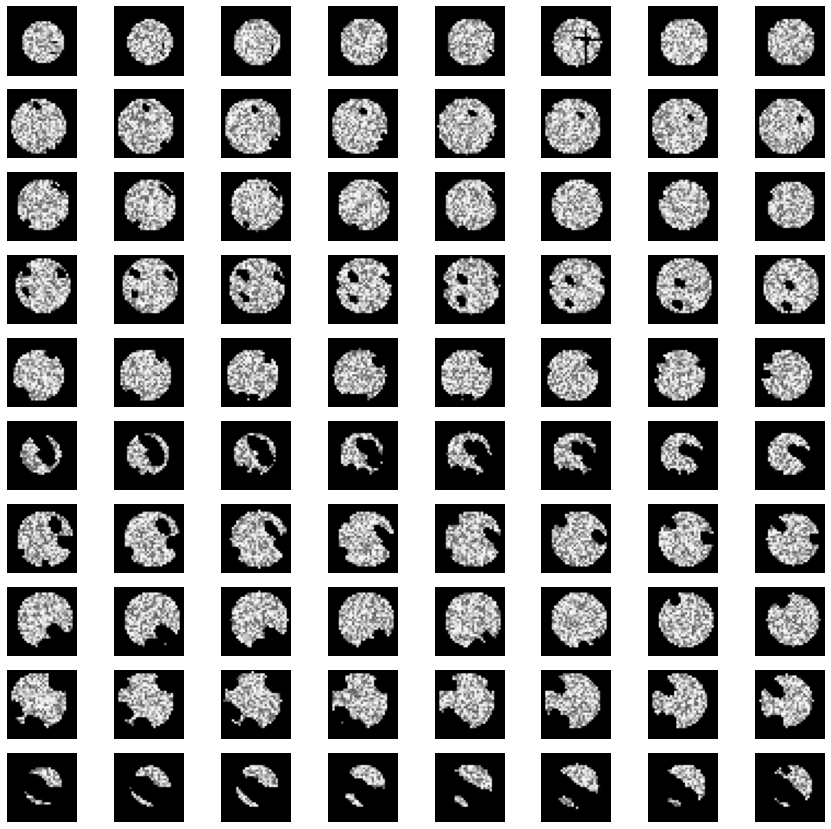

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics.pairwise import euclidean_distances
from typing import Any


np.random.seed(42)

IMAGE_SIZE = 32
NUM_TUNNELS = 6
MAX_RADIUS = 10
N = 1000

def key(x: Any):
    if isinstance(x, tuple):
        return f'{int(x[0][0])}-{int(x[1][0])}-{int(x[2][0])}'
    else:
        return f'{int(x[0])}-{int(x[1])}-{int(x[2])}'

def drill(brain: np.ndarray, surface: np.ndarray, center: np.ndarray, width: float, 
          inside_keys: set, idx: np.ndarray) -> np.ndarray:
    current_idx = np.random.choice(np.arange(len(surface)))
    current = surface[current_idx]
    direction = center - current
    direction = direction / np.sum(np.abs(direction))
    current_idx = tuple(np.expand_dims(current+direction, -1).astype(int))
    
    while key(current_idx) in inside_keys:
        vertex_radius = np.random.uniform(width // 2, 1)
        vertex_distances = euclidean_distances(idx, np.asarray(current_idx).reshape(1, 3))[:,0]
        pocket = vertex_distances <= vertex_radius
        brain[tuple(idx[pocket].T)] = 0

        next = current + direction
        direction = next - current
        direction[0] = np.random.normal(direction[0], np.abs(direction[0] / 3))
        direction[1] = np.random.normal(direction[0], np.abs(direction[1] / 3))
        direction[2] = np.random.normal(direction[0], np.abs(direction[2] / 3))
        direction = direction / np.sum(np.abs(direction))
        current = next
        current_idx = tuple(np.expand_dims(current, -1).astype(int))
        
    return brain

def create_brain(size: int, width: int, num_tunnels: int = 1):
    brain = np.zeros((size, size, size, 1))
    
    center = np.random.randint(7 * size//16, 9*size//16, 3)
    radius = np.random.randint(size//2-6, size//2-2)
    
    idx = np.asarray(np.meshgrid(*[np.arange(size) for _ in range(3)])).T.reshape(-1, 3)
    distances = euclidean_distances(idx, center.reshape(1, -1))[:,0]
    inside = distances <= radius
    surface = np.isclose(distances, radius, atol=1e-1)
    surface = idx[surface]
    
    brain[tuple(idx[inside].T)] = np.random.uniform(0.25, 1, (len(idx[inside]), 1))
    brain[tuple(idx[surface].T)] = np.random.uniform(0.25, 1, (len(idx[surface]), 1))
    
    inside_keys = set([key(x) for x in idx[inside]]) | set([key(x) for x in surface])
    
    for _ in range(num_tunnels):
        drill(brain, surface, center, width, inside_keys, idx)
    
    return brain

X = []
y = np.random.randint(1, MAX_RADIUS + 1, N)

for i in range(len(y)):
    X.append(create_brain(IMAGE_SIZE, width=y[i], num_tunnels=NUM_TUNNELS))
    print(f'{i+1}/{N}')

    
fig, ax = plt.subplots(10, 8, figsize=(15, 15))

for i in range(1, MAX_RADIUS + 1):
    idx = np.where(y == i)[0][0]
    
    for j in range(8):
        ax[i-1][j].imshow(X[idx][12+j], cmap='Greys_r')
        ax[i-1][j].axis('off')
        
plt.show()

In [2]:
from plotly.figure_factory import create_distplot

X = np.asarray(X)
y = np.asarray(y).reshape((-1, 1))
train_X = X[:int(0.6*len(X))]
train_y = y[:int(0.6*len(X))]

val_X = X[int(0.6*len(X)):int(0.8*len(X))]
val_y = y[int(0.6*len(X)):int(0.8*len(X))]

test_X = X[int(0.8*len(X)):]
test_y = y[int(0.8*len(X)):]

In [3]:
import tensorflow as tf

from tensorflow.keras import Model
from tensorflow.keras.layers import Activation, BatchNormalization, Conv3D, Dense, Dropout, Input, \
                                    GlobalAveragePooling3D, MaxPooling3D
from tensorflow.keras.regularizers import l2


np.random.seed(42)
tf.random.set_seed(42)

regularizer = l2(1e-3)
depths = [32, 64, 128, 256, 256, 64]
activation='relu'
dropout=0.5

inputs = Input((IMAGE_SIZE, IMAGE_SIZE, IMAGE_SIZE, 1))
x = inputs

for i in range(3):
    x = Conv3D(depths[i], (3, 3, 3), padding='SAME',
               activation=None, kernel_regularizer=regularizer,
               bias_regularizer=regularizer)(x)

    x = BatchNormalization()(x)
    x = Activation(activation)(x)
    x = MaxPooling3D((2, 2, 2))(x)

x = Conv3D(depths[-1], (1, 1, 1), padding='SAME', activation=None,
           kernel_regularizer=regularizer)(x)

x = BatchNormalization()(x)

x = Activation(activation)(x)
x = GlobalAveragePooling3D()(x)

x = Dense(32, activation='relu')(x)

x = Dropout(dropout)(x)
x = Dense(1, use_bias=False, activation=None)(x)

model = Model(inputs, x)

model.summary()

2022-03-25 16:16:28.979016: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-25 16:16:28.984939: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-25 16:16:28.985273: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-25 16:16:28.986322: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 32, 1)]   0         
_________________________________________________________________
conv3d (Conv3D)              (None, 32, 32, 32, 32)    896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32, 32)    128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32, 32)    0         
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 16, 16, 16, 32)    0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 16, 16, 16, 64)    55360     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 16, 64)    256   

In [4]:
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode, iplot
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam


np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss='mse', optimizer=Adam(1e-3), metrics=['mae'])

callbacks = [
    ReduceLROnPlateau(
        monitor="loss",
        factor=0.1,
        patience=10,
        min_lr=1e-5
    ),
    EarlyStopping(
        monitor="val_loss",
        min_delta=0,
        patience=50,
        restore_best_weights=True
    )
]

history = model.fit(train_X, train_y, 
                    validation_data=(val_X, val_y), 
                    batch_size=32,
                    epochs=500,
                    callbacks=callbacks)


traces = [
    go.Scatter(
        x=np.arange(len(history.history['loss'])),
        y=history.history['loss'],
        name='Training loss'
    ),
    go.Scatter(
        x=np.arange(len(history.history['loss'])),
        y=history.history['val_loss'],
        name='Validation loss'
    )
]

iplot(go.Figure(traces))

2022-03-25 16:16:29.932177: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/500


2022-03-25 16:16:30.844694: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8100
2022-03-25 16:16:31.035775: W tensorflow/stream_executor/gpu/asm_compiler.cc:113] *** WARNING *** You are using ptxas 9.1.108, which is older than 9.2.88. ptxas 9.x before 9.2.88 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You do not need to update to CUDA 9.2.88; cherry-picking the ptxas binary is sufficient.


19/19 [==============================] - 3s 60ms/step - loss: 28.5189 - mae: 4.5776 - val_loss: 34.9982 - val_mae: 5.1072
Epoch 2/500
19/19 [==============================] - 1s 43ms/step - loss: 14.3601 - mae: 3.0631 - val_loss: 29.2633 - val_mae: 4.5578
Epoch 3/500
19/19 [==============================] - 1s 44ms/step - loss: 8.1521 - mae: 2.2078 - val_loss: 21.4072 - val_mae: 3.7441
Epoch 4/500
19/19 [==============================] - 1s 45ms/step - loss: 6.6190 - mae: 2.0271 - val_loss: 20.7122 - val_mae: 3.6642
Epoch 5/500
19/19 [==============================] - 1s 43ms/step - loss: 5.8757 - mae: 1.8483 - val_loss: 21.6524 - val_mae: 3.7632
Epoch 6/500
19/19 [==============================] - 1s 45ms/step - loss: 5.3165 - mae: 1.7658 - val_loss: 21.2508 - val_mae: 3.7203
Epoch 7/500
19/19 [==============================] - 1s 44ms/step - loss: 4.7717 - mae: 1.6379 - val_loss: 21.8025 - val_mae: 3.7810
Epoch 8/500
19/19 [==============================] - 1s 44ms/step - loss: 4.509

19/19 [==============================] - 1s 44ms/step - loss: 3.7803 - mae: 1.3667 - val_loss: 1.2218 - val_mae: 0.7720
Epoch 63/500
19/19 [==============================] - 1s 45ms/step - loss: 3.9287 - mae: 1.4461 - val_loss: 1.1856 - val_mae: 0.7576
Epoch 64/500
19/19 [==============================] - 1s 45ms/step - loss: 3.6930 - mae: 1.3695 - val_loss: 1.1890 - val_mae: 0.7605
Epoch 65/500
19/19 [==============================] - 1s 44ms/step - loss: 3.7786 - mae: 1.4162 - val_loss: 1.1589 - val_mae: 0.7514
Epoch 66/500
19/19 [==============================] - 1s 45ms/step - loss: 3.7025 - mae: 1.3590 - val_loss: 1.0552 - val_mae: 0.7196
Epoch 67/500
19/19 [==============================] - 1s 45ms/step - loss: 3.9766 - mae: 1.4089 - val_loss: 1.0041 - val_mae: 0.7084
Epoch 68/500
19/19 [==============================] - 1s 45ms/step - loss: 4.3737 - mae: 1.5118 - val_loss: 0.9882 - val_mae: 0.7054
Epoch 69/500
19/19 [==============================] - 1s 46ms/step - loss: 4.0222 

In [5]:
from plotly.subplots import make_subplots


train_predictions = model.predict(train_X)
val_predictions = model.predict(val_X)
test_predictions = model.predict(test_X)

fig = make_subplots(1, 3)

fig.add_trace(
    go.Scatter(
        x=train_y.squeeze(),
        y=train_predictions.squeeze(),
        mode='markers',
        showlegend=False
    )
, row=1, col=1)
fig.add_trace(
    go.Scatter(
        x=[0, 11],
        y=[0, 11],
        mode='lines',
        showlegend=False
    )
, row=1, col=1)

fig.add_trace(
    go.Scatter(
        x=val_y.squeeze(),
        y=val_predictions.squeeze(),
        mode='markers',
        showlegend=False
    )
, row=1, col=2)
fig.add_trace(
    go.Scatter(
        x=[0, 11],
        y=[0, 11],
        mode='lines',
        showlegend=False
    )
, row=1, col=2)

fig.add_trace(
    go.Scatter(
        x=test_y.squeeze(),
        y=test_predictions.squeeze(),
        mode='markers',
        showlegend=False
    )
, row=1, col=3)
fig.add_trace(
    go.Scatter(
        x=[0, 11],
        y=[0, 11],
        mode='lines',
        showlegend=False
    )
, row=1, col=3)

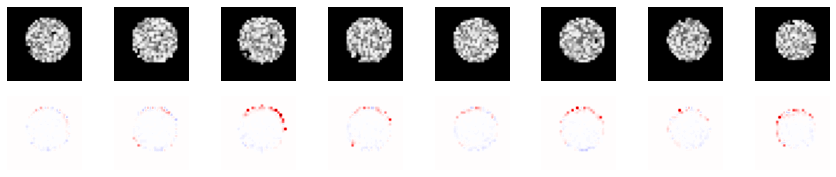

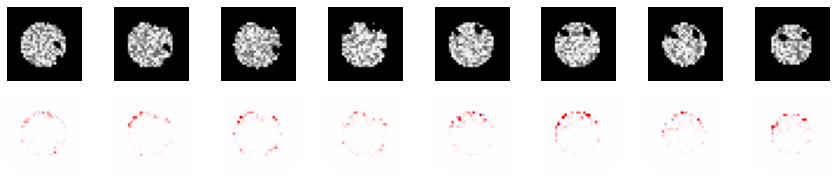

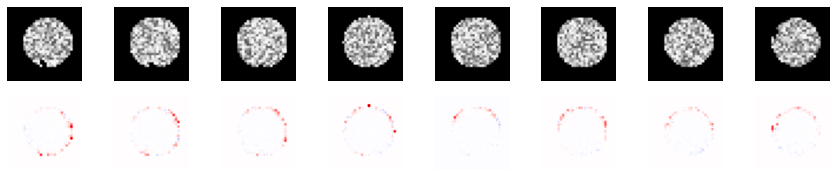

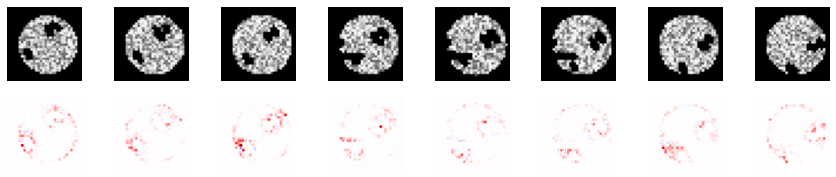

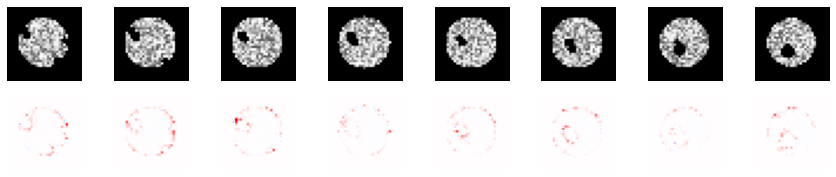

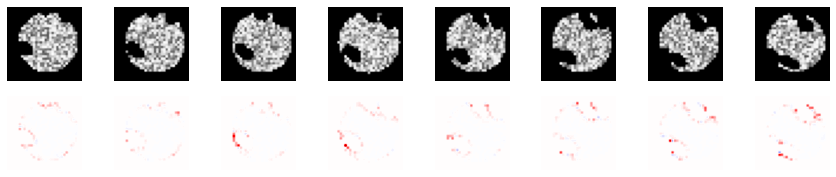

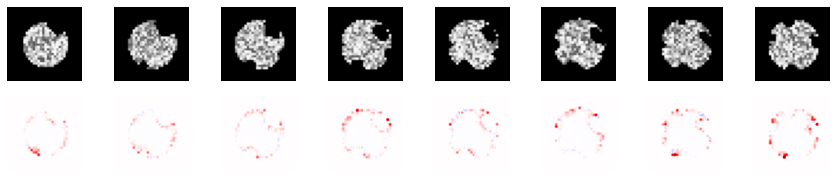

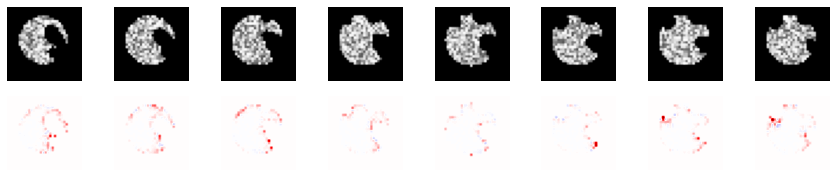

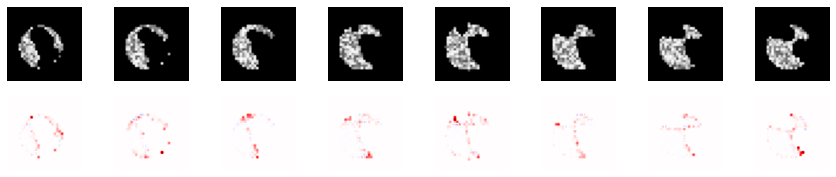

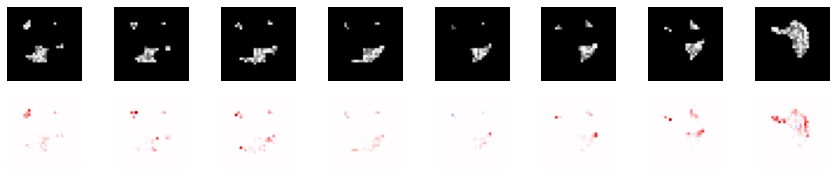

In [6]:
from explainability import LayerwiseRelevancePropagator, LRPStrategy

strategy = LRPStrategy(
    layers=[
        {'b': True},
        {'alpha': 2, 'beta': 1},
        {'alpha': 2, 'beta': 1},
        {'alpha': 2, 'beta': 1},
        {'alpha': 2, 'beta': 1},
        {'epsilon': 0.25},
    ]
)

explainer = LayerwiseRelevancePropagator(model, layer=27, idx=0, alpha=2, beta=1, ignore_input=False)


for i in range(1, MAX_RADIUS + 1):
    fig, ax = plt.subplots(2, 8, figsize=(15, 3))
    idx = np.where(test_y == i)[0][0]
    explanations = explainer(test_X[idx:(idx + 1)])
    explanations = explanations / np.amax(np.abs(explanations))
    
    for j in range(8):
        ax[0][j].imshow(test_X[idx,12+j], cmap='Greys_r')
        ax[0][j].axis('off')
        ax[1][j].imshow(explanations[0,12+j], cmap='seismic', clim=(-1, 1))
        ax[1][j].axis('off')
        
plt.show()

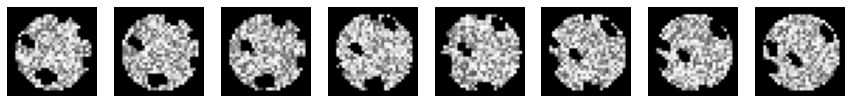

In [7]:
from plotly.colors import DEFAULT_PLOTLY_COLORS

np.random.seed(42)

brain = np.zeros((IMAGE_SIZE, IMAGE_SIZE, IMAGE_SIZE, 1))

center = np.asarray([IMAGE_SIZE // 2 for _ in range(3)])
radius = IMAGE_SIZE // 2-2

idx = np.asarray(np.meshgrid(*[np.arange(IMAGE_SIZE) for _ in range(3)])).T.reshape(-1, 3)
distances = euclidean_distances(idx, center.reshape(1, -1))[:,0]
inside = distances <= radius
surface = np.isclose(distances, radius, atol=1e-1)
surface = idx[surface]

brain[tuple(idx[inside].T)] = np.random.uniform(0.25, 1, (len(idx[inside]), 1))
brain[tuple(idx[surface].T)] = np.random.uniform(0.25, 1, (len(idx[surface]), 1))

inside_keys = set([key(x) for x in idx[inside]])

predictions = []

for _ in range(1, 2 * NUM_TUNNELS + 1):
    brain = drill(brain, surface, center, 5, inside_keys, idx)
    predictions.append(model.predict(np.expand_dims(brain, 0))[0,0])
    
fig, ax = plt.subplots(1, 8, figsize=(15, 2))

for i in range(8):
    ax[i].imshow(brain[12+i], cmap='Greys_r')
    ax[i].axis('off')

plt.show()
    
traces = [
    go.Scatter(
        x=np.arange(1, 41),
        y=predictions,
        mode='markers+lines',
        showlegend=False,
        marker={
            'color': DEFAULT_PLOTLY_COLORS[0]
        },
        line={
            'color': DEFAULT_PLOTLY_COLORS[0]
        }
    ),
    go.Scatter(
        x=[1, 2*NUM_TUNNELS],
        y=[5, 5],
        mode='lines',
        showlegend=False,
        line={
            'color': DEFAULT_PLOTLY_COLORS[2],
            'dash': 'dash'
        }
    )
]

layout = go.Layout(
    title={
        'x': 0.5,
        'text': 'Prediction as a function of number of tunnels'
    },
    xaxis={
        'title': 'Number of tunnels'
    },
    yaxis={
        'title': 'Prediction'
    }
)

iplot(go.Figure(traces, layout))

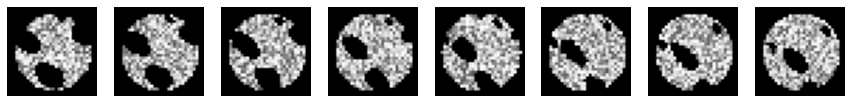

In [8]:
np.random.seed(42)

brain = np.zeros((IMAGE_SIZE, IMAGE_SIZE, IMAGE_SIZE, 1))

center = np.asarray([IMAGE_SIZE // 2 for _ in range(3)])
radius = IMAGE_SIZE // 2-2

idx = np.asarray(np.meshgrid(*[np.arange(IMAGE_SIZE) for _ in range(3)])).T.reshape(-1, 3)
distances = euclidean_distances(idx, center.reshape(1, -1))[:,0]
inside = distances <= radius
surface = np.isclose(distances, radius, atol=1e-1)
surface = idx[surface]

brain[tuple(idx[inside].T)] = np.random.uniform(0.25, 1, (len(idx[inside]), 1))
brain[tuple(idx[surface].T)] = np.random.uniform(0.25, 1, (len(idx[surface]), 1))

inside_keys = set([key(x) for x in idx[inside]])

predictions = []

for i in range(1, NUM_TUNNELS + 1):
    width = 2 + (6 * (i % 2))
    brain = drill(brain, surface, center, width, inside_keys, idx)
    predictions.append(model.predict(np.expand_dims(brain, 0))[0,0])
    
fig, ax = plt.subplots(1, 8, figsize=(15, 2))

for i in range(8):
    ax[i].imshow(brain[12+i], cmap='Greys_r')
    ax[i].axis('off')

plt.show()

colours = [DEFAULT_PLOTLY_COLORS[(i+1) % 2] for i in range(len(predictions))]
    
traces = [
    go.Scatter(
        x=np.arange(1, NUM_TUNNELS + 1),
        y=predictions,
        mode='markers+lines',
        showlegend=False,
        marker={
            'color': colours
        },
        line={
            'color': DEFAULT_PLOTLY_COLORS[0]
        },
    ),
    go.Scatter(
        x=[1, NUM_TUNNELS],
        y=[5, 5],
        mode='lines',
        showlegend=False,
        line={
            'color': DEFAULT_PLOTLY_COLORS[2],
            'dash': 'dash'
        }
    )
]

layout = go.Layout(
    title={
        'x': 0.5,
        'text': 'Prediction as a function of number of tunnels'
    },
    xaxis={
        'title': 'Number of tunnels'
    },
    yaxis={
        'title': 'Prediction'
    }
)

iplot(go.Figure(traces, layout))

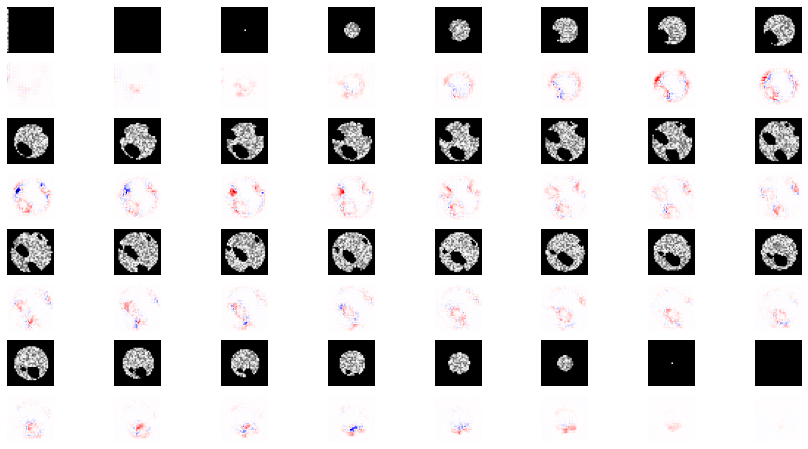

In [10]:
explainer = LayerwiseRelevancePropagator(model, layer=27, idx=0, strategy=strategy)
explanations = explainer.predict(np.expand_dims(brain, 0))[0]
explanations = explanations / np.amax(np.abs(explanations))

fig, ax = plt.subplots(8, 8, figsize=(15, 8))

for i in range(0, 8, 2):
    for j in range(8):
        idx = ((i // 2) * 8)+ j
        
        ax[i][j].imshow(brain[idx], cmap='Greys_r')
        ax[i][j].axis('off')
        ax[i+1][j].imshow(explanations[idx], cmap='seismic', clim=(-1, 1))
        ax[i+1][j].axis('off')
        
plt.savefig('standard.png')

plt.show()

In [128]:
for i in range(len(model.layers)):
    print(f'{i}: {model.layers[i]}')

0: <keras.engine.input_layer.InputLayer object at 0x7f7c9c815450>
1: <keras.layers.convolutional.Conv3D object at 0x7f7c9c815110>
2: <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f7d80a6ff10>
3: <keras.layers.core.Activation object at 0x7f7c9c7aca90>
4: <keras.layers.pooling.MaxPooling3D object at 0x7f79a4582e50>
5: <keras.layers.convolutional.Conv3D object at 0x7f7c9c445d50>
6: <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f7cac081a10>
7: <keras.layers.core.Activation object at 0x7f7d1844c810>
8: <keras.layers.pooling.MaxPooling3D object at 0x7f7d734e7310>
9: <keras.layers.convolutional.Conv3D object at 0x7f7d73571590>
10: <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f7d734eadd0>
11: <keras.layers.core.Activation object at 0x7f7d7348c0d0>
12: <keras.layers.pooling.MaxPooling3D object at 0x7f7d734e7410>
13: <keras.layers.convolutional.Conv3D object at 0x7f7c9c815410>
14: <keras.layers

In [11]:
from tensorflow.keras.layers import Add, Subtract


encoder = Model(model.input, model.layers[17].output)

z = Dense(32, activation=None)(model.layers[16].output)
a = Input((32,))

first_component = Subtract()([z, a])
first_component = Activation('relu')(first_component)
second_component = Subtract()([tf.zeros_like(z), z])
third_component = Add()([second_component, a])
second_component = Activation('relu')(second_component)
third_component = Activation('relu')(third_component)

replacement = Add()([first_component, Subtract()([second_component, third_component])])

predictions = Dense(1, use_bias=False, activation=None)(replacement)

modified = Model([model.input, a], predictions)

modified.layers[17].set_weights(model.layers[17].get_weights())
modified.layers[28].set_weights([model.layers[19].get_weights()[0]])

for i in range(len(modified.layers)):
    print(f'{i}: {modified.layers[i]}')

print(f'Original model: {model.predict(np.expand_dims(brain, 0))}')
print(f'Modified: {modified.predict([np.expand_dims(brain, 0), np.zeros((1,32))])}')

0: <keras.engine.input_layer.InputLayer object at 0x7f693c475f90>
1: <keras.layers.convolutional.Conv3D object at 0x7f6996dd5150>
2: <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f693b3cde10>
3: <keras.layers.core.Activation object at 0x7f693ab35910>
4: <keras.layers.pooling.MaxPooling3D object at 0x7f69380b9250>
5: <keras.layers.convolutional.Conv3D object at 0x7f69380caf10>
6: <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f69380d1ed0>
7: <keras.layers.core.Activation object at 0x7f69380dc350>
8: <keras.layers.pooling.MaxPooling3D object at 0x7f69380dc810>
9: <keras.layers.convolutional.Conv3D object at 0x7f69380ded90>
10: <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f6938062310>
11: <keras.layers.core.Activation object at 0x7f693e11c310>
12: <keras.layers.pooling.MaxPooling3D object at 0x7f693d6e1710>
13: <keras.layers.convolutional.Conv3D object at 0x7f6996db7fd0>
14: <keras.layers

In [12]:
idx = np.where(test_y == 5)[0]
predictions = model.predict(test_X[idx])
mean_prediction = np.mean(predictions)
test_prediction = model.predict(np.expand_dims(brain, 0))[0,0]
delta = test_prediction - 5
corrected_delta = test_prediction - mean_prediction
encodings = encoder.predict(test_X[idx])
mean_encoding = np.mean(encodings, axis=0)
encoding_stddevs = np.std(encodings, axis=0)
print(mean_encoding.shape)

print(f'Mean prediction: {mean_prediction}')
print(f'Test prediction: {test_prediction}')
print(f'Delta: {delta}')
print(f'Corrected delta: {corrected_delta}')
print(f'Internally corrected: {modified.predict([np.expand_dims(brain, 0), np.expand_dims(mean_encoding, 0)])}')
print(f'Standard deviations: {encoding_stddevs}')

(32,)
Mean prediction: 4.475991725921631
Test prediction: 6.940423011779785
Delta: 1.9404230117797852
Corrected delta: 2.4644312858581543
Internally corrected: [[2.4644308]]
Standard deviations: [0.07300041 0.         0.         0.         0.1076718  0.
 0.         0.         0.         0.13742633 0.08090099 0.
 0.         0.         0.         0.         0.1227674  0.12240174
 0.         0.         0.14271091 0.13764323 0.1632265  0.
 0.07354879 0.         0.         0.         0.13216421 0.
 0.         0.        ]


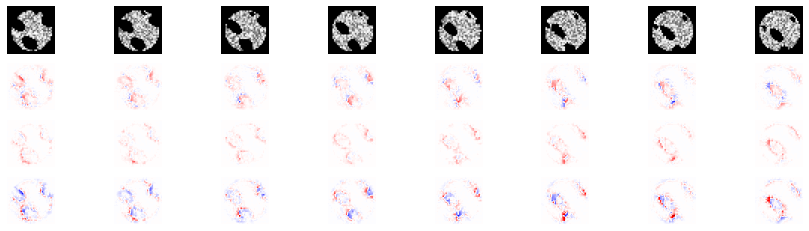

In [13]:
from tensorflow.keras.layers import Reshape

from explainability.layers import get_lrp_layer, DenseLRP

z = Dense(32, activation=None)(model.layers[16].output)
a = Input((32,))

first_component = Subtract()([z, a])
first_component = Activation('relu')(first_component)
second_component = Subtract()([tf.zeros_like(z), z])
third_component = Add()([second_component, a])
second_component = Activation('relu')(second_component)
third_component = Activation('relu')(third_component)

replacement = Add()([first_component, Subtract()([second_component, third_component])])

predictions = Dense(1, use_bias=False, activation=None)(replacement)

modified = Model([model.input, a], predictions)

modified.layers[17].set_weights(model.layers[17].get_weights())
modified.layers[28].set_weights([model.layers[19].get_weights()[0]])

input = model.layers[16].output

prev = Reshape((-1, 1))(replacement) * model.layers[-1].get_weights()[0]
prev = Reshape((-1,))(prev)
#prev = tf.where(tf.abs(prev) > 0.1, prev, tf.zeros_like(prev))
prev = DenseLRP(model.layers[17])([input, prev])

activations = [layer.output for layer in model.layers[:17]]

for i in range(16, 0, -1):
    input = activations[i-1] if i > 1 or not True \
            else tf.ones_like(activations[i-1])

    prev = get_lrp_layer(
        model.layers[i],
        alpha=2,
        beta=1,
        name=f'{i}'
    )([input, prev])
    
normalized_explainer = Model([model.input, a], prev)
normalized_explanations = normalized_explainer.predict([np.expand_dims(brain, 0), 
                                                        np.expand_dims(mean_encoding, 0)])[0]
normalized_explanations = normalized_explanations / np.amax(np.abs(normalized_explanations))

fig, ax = plt.subplots(4, 8, figsize=(15, 4))


for i in range(8):
    ax[0][i].imshow(brain[12+i], cmap='Greys_r')
    ax[0][i].axis('off')
    ax[1][i].imshow(explanations[12+i], cmap='seismic', clim=(-1, 1))
    ax[1][i].axis('off')
    ax[2][i].imshow(normalized_explanations[12+i], cmap='seismic', clim=(-1, 1))
    ax[2][i].axis('off')
    ax[3][i].imshow(normalized_explanations[12+i] - explanations[12+i], cmap='seismic', clim=(-1, 1))
    ax[3][i].axis('off')

plt.show()

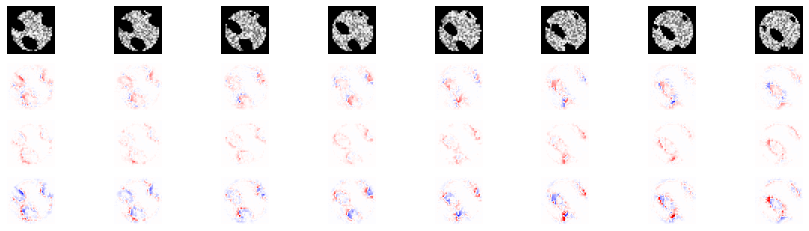

In [14]:
from explainability.layers import get_lrp_layer, DenseLRP

z = Dense(32, activation=None)(model.layers[16].output)
a = Input((32,))
sigma = Input((32,))

first_component = Subtract()([z, a])
first_component = Activation('relu')(first_component)
second_component = Subtract()([tf.zeros_like(z), z])
third_component = Add()([second_component, a])
second_component = Activation('relu')(second_component)
third_component = Activation('relu')(third_component)

replacement = Add()([first_component, Subtract()([second_component, third_component])])

predictions = Dense(1, use_bias=False, activation=None)(replacement)

modified = Model([model.input, a], predictions)

modified.layers[17].set_weights(model.layers[17].get_weights())
modified.layers[28].set_weights([model.layers[19].get_weights()[0]])

input = model.layers[16].output

prev = Reshape((-1, 1))(replacement) * model.layers[-1].get_weights()[0]
prev = Reshape((-1,))(prev)
prev = tf.where(tf.abs(prev) > sigma, prev, tf.zeros_like(prev))


prev = DenseLRP(model.layers[17])([input, prev])

activations = [layer.output for layer in model.layers[:17]]

for i in range(16, 0, -1):
    input = activations[i-1] if i > 1 or not True \
            else tf.ones_like(activations[i-1])

    prev = get_lrp_layer(
        model.layers[i],
        alpha=2,
        beta=1,
        name=f'{i}'
    )([input, prev])
    
thresholded_explainer = Model([model.input, a, sigma], prev)
thresholded_explanations = thresholded_explainer.predict([np.expand_dims(brain, 0), 
                                                          np.expand_dims(mean_encoding, 0), 
                                                          np.expand_dims(encoding_stddevs, 0)])[0]
thresholded_explanations = thresholded_explanations / np.amax(np.abs(thresholded_explanations))

fig, ax = plt.subplots(4, 8, figsize=(15, 4))


for i in range(8):
    ax[0][i].imshow(brain[12+i], cmap='Greys_r')
    ax[0][i].axis('off')
    ax[1][i].imshow(explanations[12+i], cmap='seismic', clim=(-1, 1))
    ax[1][i].axis('off')
    ax[2][i].imshow(thresholded_explanations[12+i], cmap='seismic', clim=(-1, 1))
    ax[2][i].axis('off')
    ax[3][i].imshow(thresholded_explanations[12+i] - explanations[12+i], cmap='seismic', clim=(-1, 1))
    ax[3][i].axis('off')

plt.show()

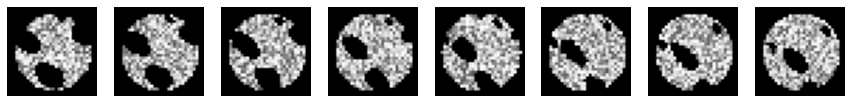

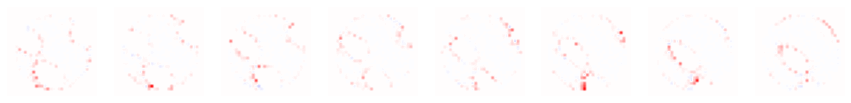

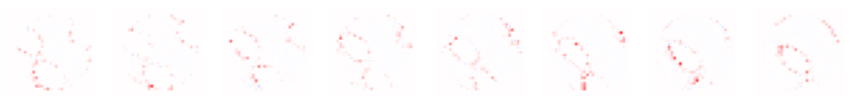

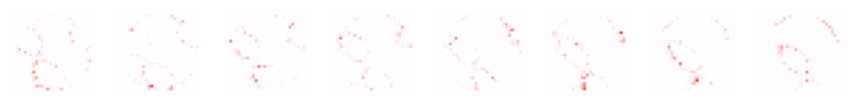

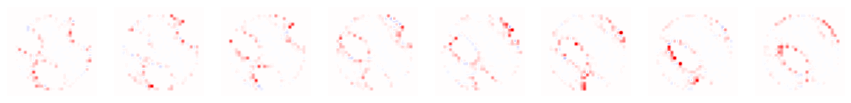

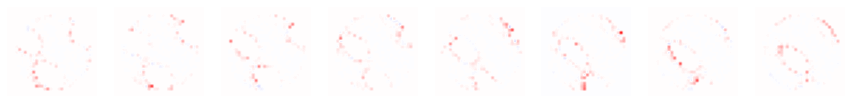

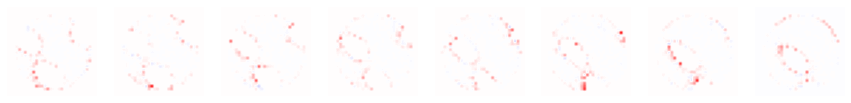

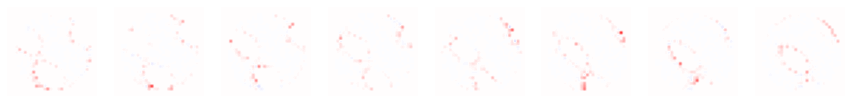

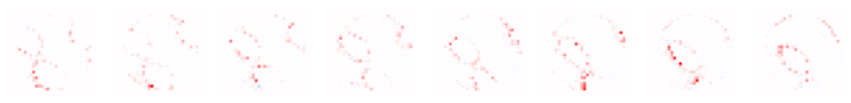

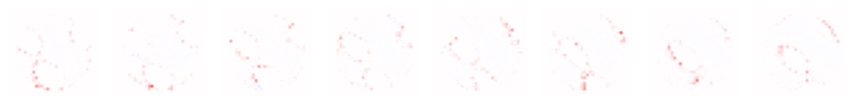

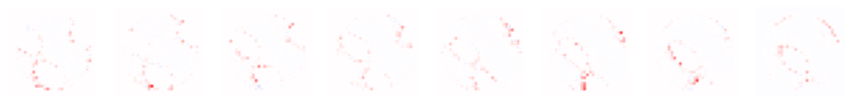

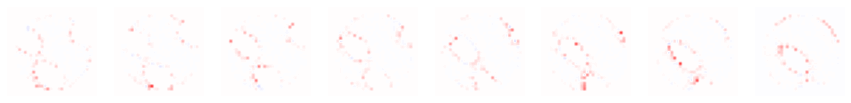

In [15]:
tmp = Model(model.input, model.layers[17].output)

fig, ax = plt.subplots(1, 8, figsize=(15, 3))

for i in range(8):
    ax[i].imshow(brain[12+i], cmap='Greys_r')
    ax[i].axis('off')
    
plt.show()

for i in range(32):
    explainer = LayerwiseRelevancePropagator(tmp, layer=17, idx=i, alpha=2, beta=1, ignore_input=False)
    explanations = explainer.predict(np.expand_dims(brain, 0))[0]

    if np.sum(explanations) == 0:
        continue
    
    explanations = explanations / np.amax(np.abs(explanations))

    fig, ax = plt.subplots(1, 8, figsize=(15, 8))

    for j in range(8):
        ax[j].imshow(explanations[12+j], cmap='seismic', clim=(-1, 1))
        ax[j].axis('off')

    plt.show()

/home/esten/miniconda3/envs/ml/lib/python3.7/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning:

invalid value encountered in true_divide

/home/esten/miniconda3/envs/ml/lib/python3.7/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning:

invalid value encountered in true_divide



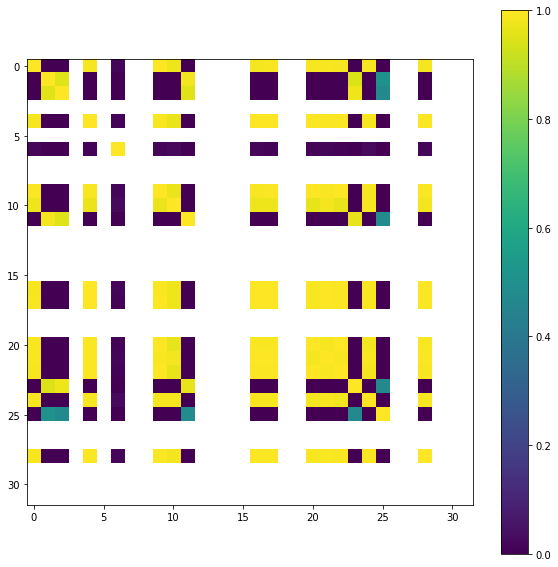

In [16]:
train_encodings = encoder.predict(train_X)

correlations = [[np.corrcoef(train_encodings[:,i], train_encodings[:,j])[0,1] \
                 for i in range(32)] for j in range(32)]

plt.figure(figsize=(10, 10))
heatmap = plt.imshow(correlations, clim=(0, 1))
plt.colorbar(heatmap)
plt.show()

In [25]:
from tensorflow.keras.layers import GlobalMaxPooling3D, Reshape

np.random.seed(42)
tf.random.set_seed(42)

regularizer = l2(1e-3)
depths = [32, 64, 128, 256, 256, 64]
activation='relu'
dropout=0.5

inputs = Input((IMAGE_SIZE, IMAGE_SIZE, IMAGE_SIZE, 1))
x = inputs

for i in range(3):
    x = Conv3D(depths[i], (3, 3, 3), padding='SAME',
               activation=None, kernel_regularizer=regularizer,
               bias_regularizer=regularizer)(x)

    x = BatchNormalization()(x)
    x = Activation(activation)(x)
    x = MaxPooling3D((2, 2, 2))(x)

x = BatchNormalization()(x)

x = Activation(activation)(x)
x = Reshape((-1,))(x)
x = Dropout(dropout)(x)

x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Activation(activation)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Activation(activation)(x)

x = Dense(32, activation='relu')(x)

x = Dense(1, use_bias=False, activation=None)(x)

model = Model(inputs, x)

model.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 32, 32, 32, 1)]   0         
_________________________________________________________________
conv3d_8 (Conv3D)            (None, 32, 32, 32, 32)    896       
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32, 32)    128       
_________________________________________________________________
activation_23 (Activation)   (None, 32, 32, 32, 32)    0         
_________________________________________________________________
max_pooling3d_6 (MaxPooling3 (None, 16, 16, 16, 32)    0         
_________________________________________________________________
conv3d_9 (Conv3D)            (None, 16, 16, 16, 64)    55360     
_________________________________________________________________
batch_normalization_9 (Batch (None, 16, 16, 16, 64)    256

In [26]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss='mse', optimizer=Adam(1e-3), metrics=['mae'])

callbacks = [
    ReduceLROnPlateau(
        monitor="loss",
        factor=0.1,
        patience=10,
        min_lr=1e-5
    ),
    EarlyStopping(
        monitor="val_loss",
        min_delta=0,
        patience=50,
        restore_best_weights=True
    )
]

history = model.fit(train_X, train_y, 
                    validation_data=(val_X, val_y), 
                    batch_size=32,
                    epochs=500,
                    callbacks=callbacks)


traces = [
    go.Scatter(
        x=np.arange(len(history.history['loss'])),
        y=history.history['loss'],
        name='Training loss'
    ),
    go.Scatter(
        x=np.arange(len(history.history['loss'])),
        y=history.history['val_loss'],
        name='Validation loss'
    )
]

iplot(go.Figure(traces))

Epoch 1/500
19/19 [==============================] - 2s 56ms/step - loss: 22.2301 - mae: 3.8634 - val_loss: 27.6405 - val_mae: 4.3961
Epoch 2/500
19/19 [==============================] - 1s 44ms/step - loss: 7.5452 - mae: 2.1066 - val_loss: 11.6550 - val_mae: 2.8427
Epoch 3/500
19/19 [==============================] - 1s 44ms/step - loss: 5.2627 - mae: 1.8230 - val_loss: 11.0877 - val_mae: 2.7931
Epoch 4/500
19/19 [==============================] - 1s 43ms/step - loss: 4.3165 - mae: 1.6226 - val_loss: 9.7675 - val_mae: 2.6551
Epoch 5/500
19/19 [==============================] - 1s 43ms/step - loss: 3.3828 - mae: 1.4335 - val_loss: 8.5684 - val_mae: 2.4886
Epoch 6/500
19/19 [==============================] - 1s 44ms/step - loss: 3.2313 - mae: 1.3759 - val_loss: 8.4695 - val_mae: 2.4795
Epoch 7/500
19/19 [==============================] - 1s 44ms/step - loss: 2.8004 - mae: 1.2950 - val_loss: 8.6848 - val_mae: 2.5152
Epoch 8/500
19/19 [==============================] - 1s 43ms/step - loss

19/19 [==============================] - 1s 46ms/step - loss: 0.8780 - mae: 0.6630 - val_loss: 2.8776 - val_mae: 1.3404
Epoch 63/500
19/19 [==============================] - 1s 45ms/step - loss: 0.7561 - mae: 0.6037 - val_loss: 1.9868 - val_mae: 1.0657
Epoch 64/500
19/19 [==============================] - 1s 46ms/step - loss: 0.6854 - mae: 0.5818 - val_loss: 1.7164 - val_mae: 0.9609
Epoch 65/500
19/19 [==============================] - 1s 49ms/step - loss: 0.8231 - mae: 0.6381 - val_loss: 1.1757 - val_mae: 0.7838
Epoch 66/500
19/19 [==============================] - 1s 48ms/step - loss: 0.6503 - mae: 0.5637 - val_loss: 2.1434 - val_mae: 1.1386
Epoch 67/500
19/19 [==============================] - 1s 47ms/step - loss: 0.6632 - mae: 0.5684 - val_loss: 2.4781 - val_mae: 1.2538
Epoch 68/500
19/19 [==============================] - 1s 45ms/step - loss: 0.8459 - mae: 0.6466 - val_loss: 2.5576 - val_mae: 1.2129
Epoch 69/500
19/19 [==============================] - 1s 44ms/step - loss: 0.6016 

19/19 [==============================] - 1s 48ms/step - loss: 0.5326 - mae: 0.4833 - val_loss: 0.9256 - val_mae: 0.6418
Epoch 124/500
19/19 [==============================] - 1s 49ms/step - loss: 0.5399 - mae: 0.4778 - val_loss: 0.9317 - val_mae: 0.6455
Epoch 125/500
19/19 [==============================] - 1s 45ms/step - loss: 0.4858 - mae: 0.4469 - val_loss: 0.9547 - val_mae: 0.6565
Epoch 126/500
19/19 [==============================] - 1s 47ms/step - loss: 0.4414 - mae: 0.4238 - val_loss: 0.9597 - val_mae: 0.6583
Epoch 127/500
19/19 [==============================] - 1s 48ms/step - loss: 0.4890 - mae: 0.4550 - val_loss: 0.9501 - val_mae: 0.6531
Epoch 128/500
19/19 [==============================] - 1s 48ms/step - loss: 0.5268 - mae: 0.4861 - val_loss: 0.9371 - val_mae: 0.6459
Epoch 129/500
19/19 [==============================] - 1s 49ms/step - loss: 0.4444 - mae: 0.4301 - val_loss: 0.9272 - val_mae: 0.6402
Epoch 130/500
19/19 [==============================] - 1s 49ms/step - loss: 

19/19 [==============================] - 1s 46ms/step - loss: 0.4089 - mae: 0.3999 - val_loss: 0.9165 - val_mae: 0.6349
Epoch 185/500
19/19 [==============================] - 1s 47ms/step - loss: 0.4462 - mae: 0.4270 - val_loss: 0.9151 - val_mae: 0.6339
Epoch 186/500
19/19 [==============================] - 1s 49ms/step - loss: 0.4140 - mae: 0.4026 - val_loss: 0.9324 - val_mae: 0.6424
Epoch 187/500
19/19 [==============================] - 1s 46ms/step - loss: 0.4938 - mae: 0.4553 - val_loss: 0.9575 - val_mae: 0.6541
Epoch 188/500
19/19 [==============================] - 1s 46ms/step - loss: 0.4604 - mae: 0.4322 - val_loss: 0.9753 - val_mae: 0.6627
Epoch 189/500
19/19 [==============================] - 1s 45ms/step - loss: 0.5259 - mae: 0.4793 - val_loss: 0.9855 - val_mae: 0.6679
Epoch 190/500
19/19 [==============================] - 1s 44ms/step - loss: 0.4068 - mae: 0.3908 - val_loss: 0.9675 - val_mae: 0.6590
Epoch 191/500
19/19 [==============================] - 1s 44ms/step - loss: 

19/19 [==============================] - 1s 48ms/step - loss: 0.4119 - mae: 0.4036 - val_loss: 0.9186 - val_mae: 0.6387
Epoch 246/500
19/19 [==============================] - 1s 45ms/step - loss: 0.4795 - mae: 0.4454 - val_loss: 0.9257 - val_mae: 0.6427
Epoch 247/500
19/19 [==============================] - 1s 45ms/step - loss: 0.4324 - mae: 0.4247 - val_loss: 0.9076 - val_mae: 0.6331
Epoch 248/500
19/19 [==============================] - 1s 45ms/step - loss: 0.4257 - mae: 0.4107 - val_loss: 0.9110 - val_mae: 0.6345
Epoch 249/500
19/19 [==============================] - 1s 47ms/step - loss: 0.4291 - mae: 0.4135 - val_loss: 0.9296 - val_mae: 0.6446
Epoch 250/500
19/19 [==============================] - 1s 44ms/step - loss: 0.4224 - mae: 0.4169 - val_loss: 0.9166 - val_mae: 0.6372
Epoch 251/500
19/19 [==============================] - 1s 49ms/step - loss: 0.4550 - mae: 0.4260 - val_loss: 0.9089 - val_mae: 0.6336
Epoch 252/500
19/19 [==============================] - 1s 47ms/step - loss: 

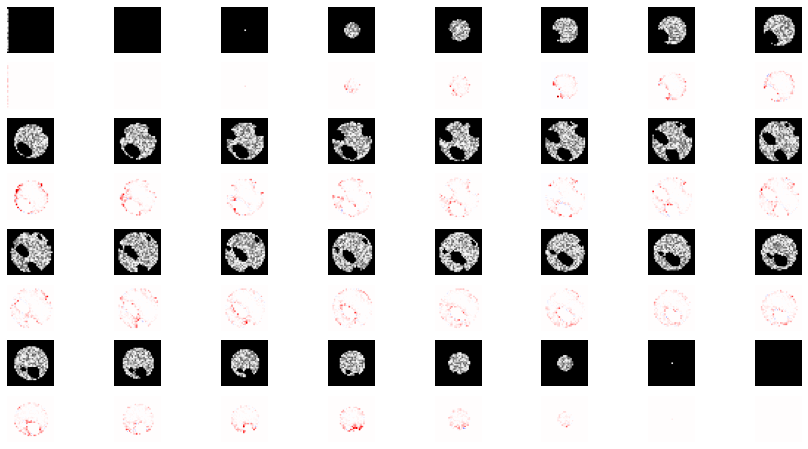

In [27]:
from explainability import LayerwiseRelevancePropagator

strategy = LRPStrategy(
    layers=[
        {'b': True},
        {'alpha': 2, 'beta': 1},
        {'alpha': 2, 'beta': 1},
        {'alpha': 2, 'beta': 1},
        {'alpha': 2, 'beta': 1},
        {'epsilon': 0.25},
        {'epsilon': 0.25}
    ]
)

explainer = LayerwiseRelevancePropagator(model, layer=28, idx=0, alpha=2, beta=1, ignore_input=False)
explanations = explainer.predict(np.expand_dims(brain, 0))[0]
explanations = explanations / np.amax(np.abs(explanations))

fig, ax = plt.subplots(8, 8, figsize=(15, 8))

for i in range(0, 8, 2):
    for j in range(8):
        idx = ((i // 2) * 8)+ j
        
        ax[i][j].imshow(brain[idx], cmap='Greys_r')
        ax[i][j].axis('off')
        ax[i+1][j].imshow(explanations[idx], cmap='seismic', clim=(-1, 1))
        ax[i+1][j].axis('off')

plt.show()

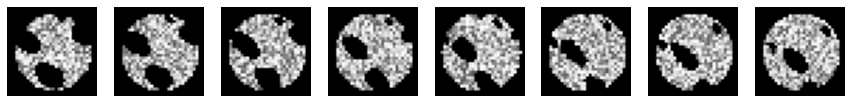

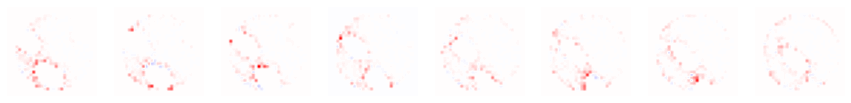

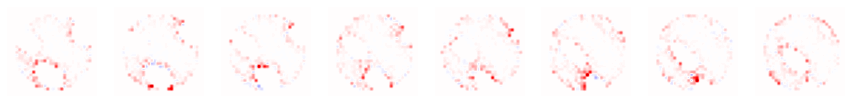

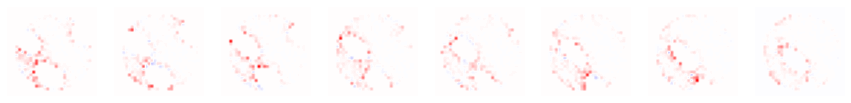

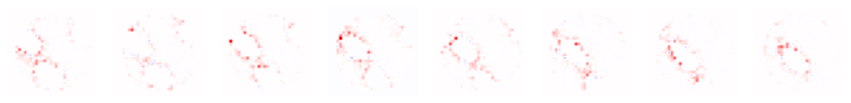

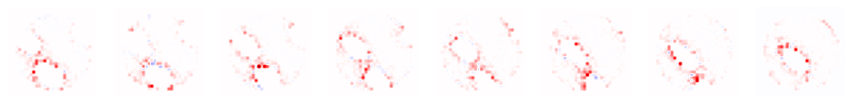

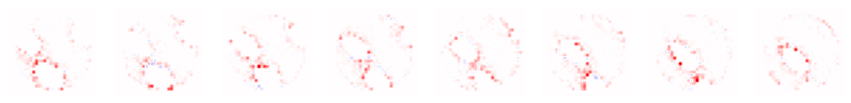

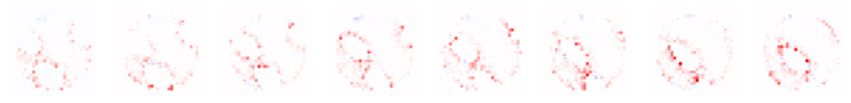

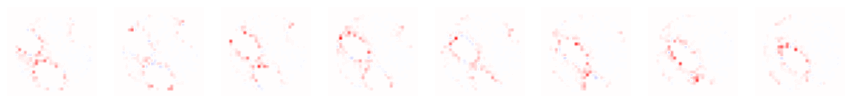

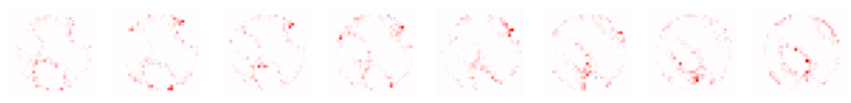

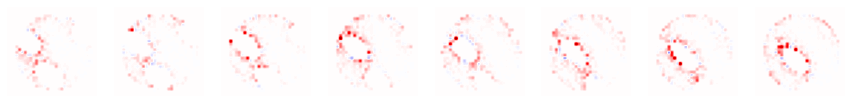

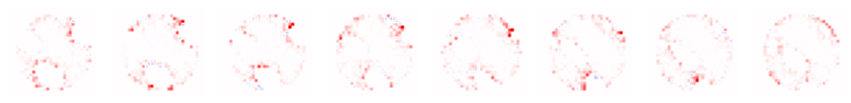

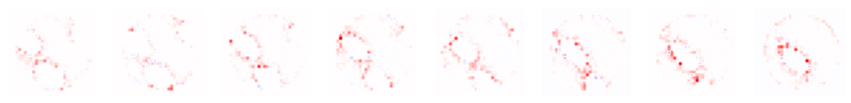

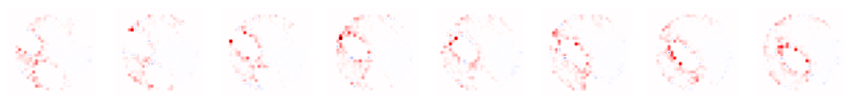

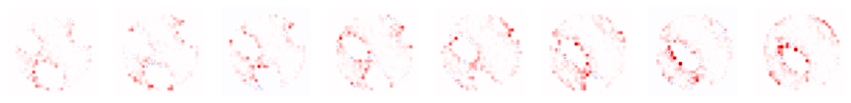

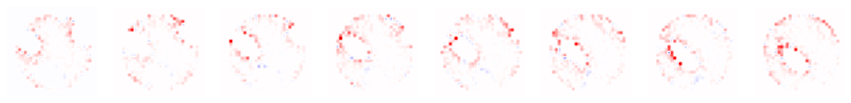

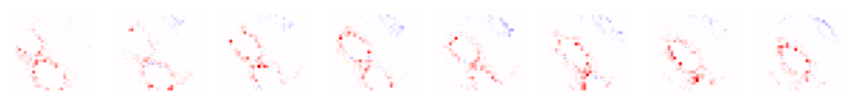

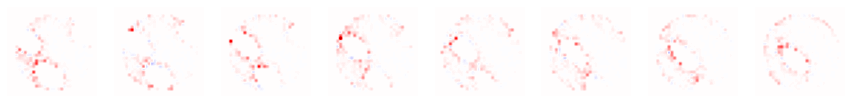

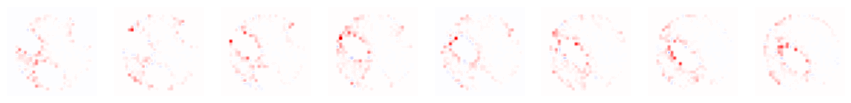

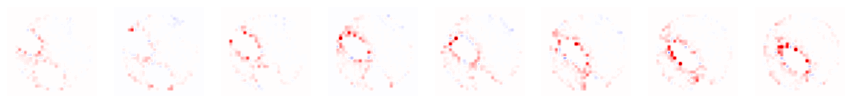

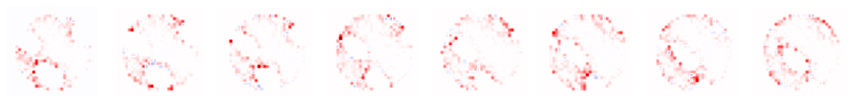

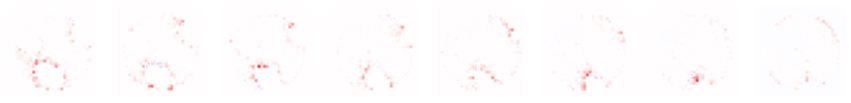

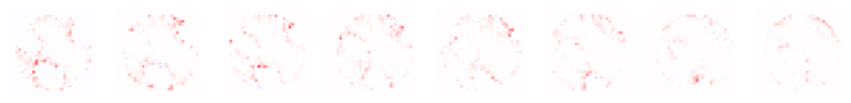

In [28]:
tmp = Model(model.input, model.layers[17].output)

fig, ax = plt.subplots(1, 8, figsize=(15, 3))

for i in range(8):
    ax[i].imshow(brain[12+i], cmap='Greys_r')
    ax[i].axis('off')
    
plt.show()

for i in range(32):
    explainer = LayerwiseRelevancePropagator(tmp, layer=17, idx=i, alpha=2, beta=1, ignore_input=False)
    explanations = explainer.predict(np.expand_dims(brain, 0))[0]

    if np.sum(explanations) == 0:
        continue
    
    explanations = explanations / np.amax(np.abs(explanations))

    fig, ax = plt.subplots(1, 8, figsize=(15, 8))

    for j in range(8):
        ax[j].imshow(explanations[12+j], cmap='seismic', clim=(-1, 1))
        ax[j].axis('off')

    plt.show()

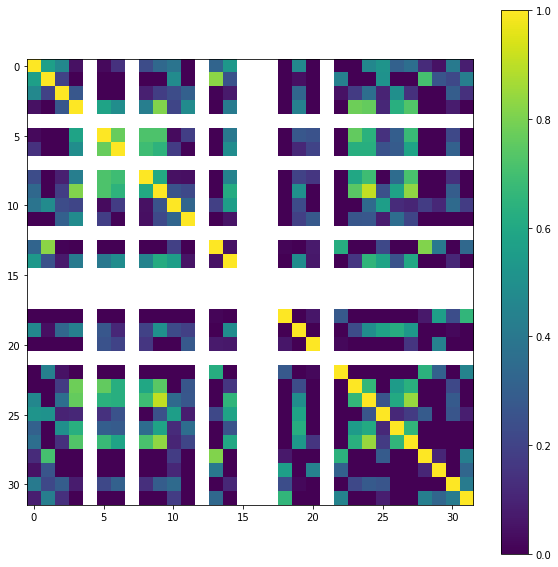

In [29]:
encoder = Model(model.input, model.layers[17].output)

train_encodings = encoder.predict(train_X)

correlations = [[np.corrcoef(train_encodings[:,i], train_encodings[:,j])[0,1] \
                 for i in range(32)] for j in range(32)]

plt.figure(figsize=(10, 10))
heatmap = plt.imshow(correlations, clim=(0, 1))
plt.colorbar(heatmap)
plt.show()

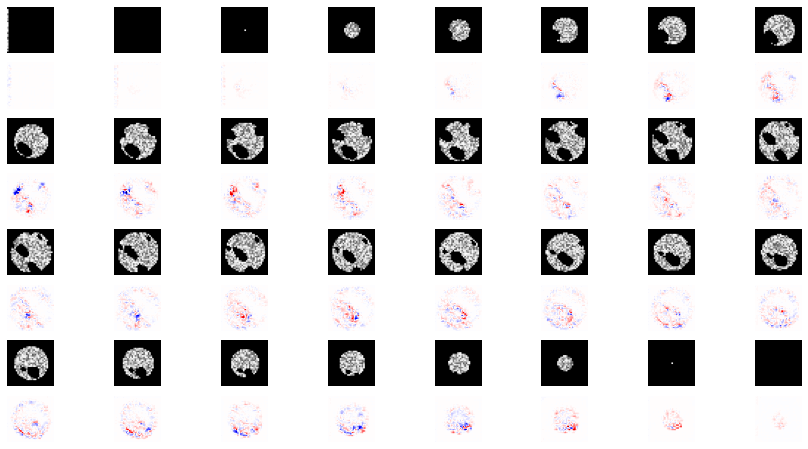

In [30]:
explainer = LayerwiseRelevancePropagator(model, layer=27, idx=0, strategy=strategy, ignore_input=False)
explanations = explainer.predict(np.expand_dims(brain, 0))[0]
explanations = explanations / np.amax(np.abs(explanations))

fig, ax = plt.subplots(8, 8, figsize=(15, 8))

for i in range(0, 8, 2):
    for j in range(8):
        idx = ((i // 2) * 8)+ j
        
        ax[i][j].imshow(brain[idx], cmap='Greys_r')
        ax[i][j].axis('off')
        ax[i+1][j].imshow(explanations[idx], cmap='seismic', clim=(-1, 1))
        ax[i+1][j].axis('off')

plt.show()

In [31]:
from tensorflow.keras.layers import Reshape

from explainability.layers import get_lrp_layer, DenseLRP

z = Dense(32, activation=None)(model.layers[17].output)
a = Input((32,))

first_component = Subtract()([z, a])
first_component = Activation('relu')(first_component)
second_component = Subtract()([tf.zeros_like(z), z])
third_component = Add()([second_component, a])
second_component = Activation('relu')(second_component)
third_component = Activation('relu')(third_component)

replacement = Add()([first_component, Subtract()([second_component, third_component])])

predictions = Dense(1, use_bias=False, activation=None)(replacement)

modified = Model([model.input, a], predictions)

modified.layers[18].set_weights(model.layers[19].get_weights())
modified.layers[29].set_weights([model.layers[20].get_weights()[0]])

input = model.layers[17].output

prev = Reshape((-1, 1))(replacement) * model.layers[-1].get_weights()[0]
prev = Reshape((-1,))(prev)
prev = DenseLRP(model.layers[19])([input, prev])

activations = [layer.output for layer in model.layers[:18]]

for i in range(17, 0, -1):
    input = activations[i-1]

    prev = get_lrp_layer(
        model.layers[i],
        alpha=2,
        beta=1,
        name=f'{i}'
    )([input, prev])
    
normalized_explainer = Model([model.input, a], prev)
normalized_explanations = normalized_explainer.predict([np.expand_dims(brain, 0), 
                                                        np.expand_dims(mean_encoding, 0)])[0]
normalized_explanations = normalized_explanations / np.amax(np.abs(normalized_explanations))

fig, ax = plt.subplots(4, 8, figsize=(15, 4))


for i in range(8):
    ax[0][i].imshow(brain[12+i], cmap='Greys_r')
    ax[0][i].axis('off')
    ax[1][i].imshow(explanations[12+i], cmap='seismic', clim=(-1, 1))
    ax[1][i].axis('off')
    ax[2][i].imshow(normalized_explanations[12+i], cmap='seismic', clim=(-1, 1))
    ax[2][i].axis('off')
    ax[3][i].imshow(normalized_explanations[12+i] - explanations[12+i], cmap='seismic', clim=(-1, 1))
    ax[3][i].axis('off')

plt.show()

ValueError: You called `set_weights(weights)` on layer "dense_18" with a weight list of length 0, but the layer was expecting 2 weights. Provided weights: []...

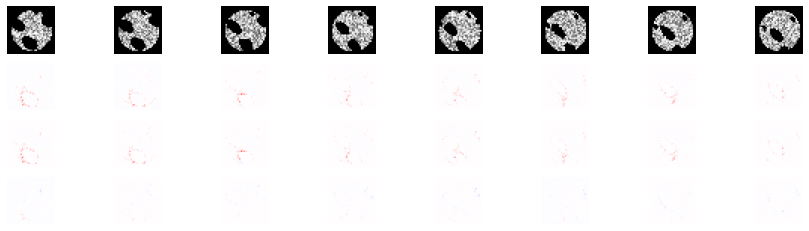

In [23]:
from explainability.layers import get_lrp_layer, DenseLRP

z = Dense(32, activation=None)(model.layers[17].output)
a = Input((32,))
sigma = Input((32,))

first_component = Subtract()([z, a])
first_component = Activation('relu')(first_component)
second_component = Subtract()([tf.zeros_like(z), z])
third_component = Add()([second_component, a])
second_component = Activation('relu')(second_component)
third_component = Activation('relu')(third_component)

replacement = Add()([first_component, Subtract()([second_component, third_component])])

predictions = Dense(1, use_bias=False, activation=None)(replacement)

modified = Model([model.input, a], predictions)

modified.layers[18].set_weights(model.layers[19].get_weights())
modified.layers[29].set_weights([model.layers[20].get_weights()[0]])

input = model.layers[17].output

prev = Reshape((-1, 1))(replacement) * model.layers[-1].get_weights()[0]
prev = Reshape((-1,))(prev)

prev = tf.where(replacement > (2 * sigma), prev, tf.zeros_like(prev))

tmp = Model([model.input, a, sigma], prev)

prev = DenseLRP(model.layers[19])([input, prev])

activations = [layer.output for layer in model.layers[:17]]

for i in range(17, 0, -1):
    input = activations[i-1]

    prev = get_lrp_layer(
        model.layers[i],
        alpha=2,
        beta=1,
        name=f'{i}'
    )([input, prev])
    
thresholded_explainer = Model([model.input, a, sigma], prev)
thresholded_explanations = thresholded_explainer.predict([np.expand_dims(brain, 0), 
                                                          np.expand_dims(mean_encoding, 0), 
                                                          np.expand_dims(encoding_stddevs, 0)])[0]
thresholded_explanations = thresholded_explanations / np.amax(np.abs(thresholded_explanations))

fig, ax = plt.subplots(4, 8, figsize=(15, 4))


for i in range(8):
    ax[0][i].imshow(brain[12+i], cmap='Greys_r')
    ax[0][i].axis('off')
    ax[1][i].imshow(explanations[12+i], cmap='seismic', clim=(-1, 1))
    ax[1][i].axis('off')
    ax[2][i].imshow(thresholded_explanations[12+i], cmap='seismic', clim=(-1, 1))
    ax[2][i].axis('off')
    ax[3][i].imshow(thresholded_explanations[12+i] - normalized_explanations[12+i], cmap='seismic', clim=(-1, 1))
    ax[3][i].axis('off')

plt.show()

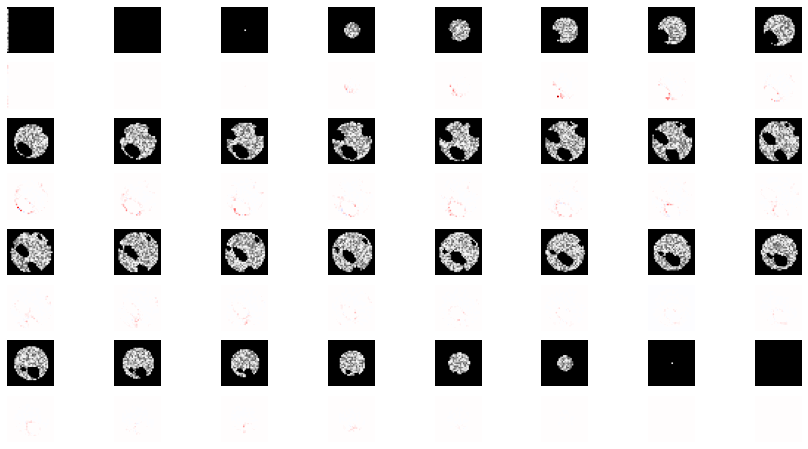

In [24]:
fig, ax = plt.subplots(8, 8, figsize=(15, 8))

for i in range(0, 8, 2):
    for j in range(8):
        idx = ((i // 2) * 8)+ j
        
        ax[i][j].imshow(brain[idx], cmap='Greys_r')
        ax[i][j].axis('off')
        ax[i+1][j].imshow(thresholded_explanations[idx], cmap='seismic', clim=(-1, 1))
        ax[i+1][j].axis('off')
        
plt.savefig('thresholded.png')

plt.show()